## IBM 직원 퇴사 데이터 분석

### Business Understanding (비즈니스이해)

#### **문제**

* 직원 퇴사율 증가

#### **가설**

* 나이와 퇴사는 관련이 있다.
* 출장 빈도외 퇴사는 관련이 있다.
* 월급과 퇴사는 관련이 있다.
* 급여 인상률과 퇴사는 관련이 있다.
* 스톡 옵션과 퇴사는 관련이 있다.
* 집에서부터 회사까지의 거리와 퇴사는 관련이 있다.
* 업무 환경 만족도/직무 만족도/동료와의 관계 만족도와 퇴사는 관련이 있다.
* 야근 여부와 퇴사는 관련이 있다.
* 워라벨과 퇴사는 관련이 있다.
* 결혼 상태와 퇴사는 관련이 있다.

### Data Understanding (데이터 이해)

#### **변수 설명**
* Y : Attrition (퇴사 여부 -> 'Yes', 'No')
* X
    * Age (나이)
    * BusinessTravel (출장 빈도)
    * DailyRate (일일 급여)
    * Department (부서)
    * DistanceFromHome (집에서부터 회사까지의 거리)
    * Education (학력 -> 1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor)
    * EducationField (전공)
    * EmployeeCount (직원 수 -> 전부 1)
    * EmployeeNumber (직원 고유 번호)
    * EnvironmentSatisfaction (업무 환경 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * Gender (성별)
    * HourlyRate (시급)
    * JobInvolvement (직무 참여도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * JobLevel (직급)
    * JobRole (직무)
    * JobSatisfaction (직무 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * MaritalStatus (결혼 여부)
    * MonthlyIncome (월 소득)
    * MonthlyRate (월급)
    * NumCompaniesWorked (근무한 회사 수)
    * Over18 (18세 이상 여부 -> 전부 Y)
    * OverTime (야근)
    * PercentSalaryHike (급여 인상률)
    * PerformanceRating (성과 등급 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * RelationshipSatisfaction (동료와의 관계 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * StandardHours (근무 시간 -> 전부 80)
    * StockOptionLevel (스톡 옵션)
    * TotalWorkingYears (경력 기간)
    * TrainingTimesLastYear (지난해 받은 교육 시간)
    * WorkLifeBalance (워라벨 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * YearsAtCompany (근속 연수)
    * YearsInCurrentRole (현재 직무 경력 기간)
    * YearsSinceLastPromotion (마지막 승진 이후 경과된 시간)
    * YearsWithCurrManager (현재 관리자와 함께 일한 기간)

In [2]:
# 라이브러리 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import scipy.stats as spst

In [3]:
# 데이터 로딩
data = pd.read_csv('./employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# 데이터 요약 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **데이터프레임 구조 만들기**

##### **컬럼 삭제**

모든 직원이 동일한 값을 가지고 있는 'EmployeeCount', 'Over18', 'StandardHours'는 고려하지 않겠다.

In [5]:
data2 = data.copy()

data2.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
data2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


##### **컬럼 이름 변경**

In [6]:
# data2.columns = [] / data2.rename(columns = {})
data2.rename(columns={'DistanceFromHome': 'Distance', 'EmployeeNumber': 'EmployeeNo', 'EnvironmentSatisfaction': 'E_Sat', 'JobSatisfaction': 'J_Sat', 'RelationshipSatisfaction': 'R_Sat'}, inplace=True)
data2

,Age,Attrition,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeNo,E_Sat,...,PerformanceRating,R_Sat,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


##### **값 변경하기**

In [7]:
# np.where() : Attrition의 값이 'Yes'일 경우 1, 'No'일 경우 0으로 바꾸기
data2['Attrition'] = np.where(data2['Attrition'] == 'Yes', 1, 0)

# map() : OverTime 값이 'Yes'일 경우 1, 'No'일 경우 0으로 바꾸기
data2['OverTime'] = data2['OverTime'].map({'Yes': 1, 'No': 0})

data2

,Age,Attrition,BusinessTravel,DailyRate,Department,Distance,Education,EducationField,EmployeeNo,E_Sat,...,PerformanceRating,R_Sat,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


#### **단변량 분석**

In [30]:
# 수치형 변수 함수
def eda_1_num(x, data, bins = 30):
    # 기초 통계량
    display(data[[x]].describe().T)
    
    # 시각화
    plt.figure(figsize = (6, 6))
    
    plt.subplot(2, 1, 1)
    sns.histplot(x = x, data = data, bins = bins, kde = True)
    plt.grid()
    
    plt.subplot(2, 1, 2)
    sns.boxplot(x = x, data = data)
    plt.grid()
    
    plt.show()

In [71]:
# 범주형 변수 함수
def eda_1_cat(x, data, rotation = 0):
    # 기초 통계량
    display(data[x].value_counts())
    display(data[x].value_counts(normalize = True))
    
    # 시각화
    sns.countplot(x = x, data = data)
    plt.xticks(rotation = rotation)
    plt.grid()
    plt.show()

##### **수치형 변수**

**Attrition**

Attrition
0    1233
1     237
Name: count, dtype: int64

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

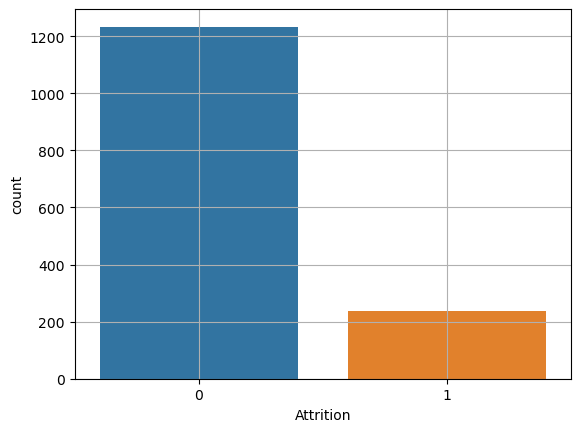

In [72]:
eda_1_cat('Attrition', data2)

* 전체 직원의 16% 정도가 퇴사하였다.

**OverTime**

OverTime
0    1054
1     416
Name: count, dtype: int64

OverTime
0    0.717007
1    0.282993
Name: proportion, dtype: float64

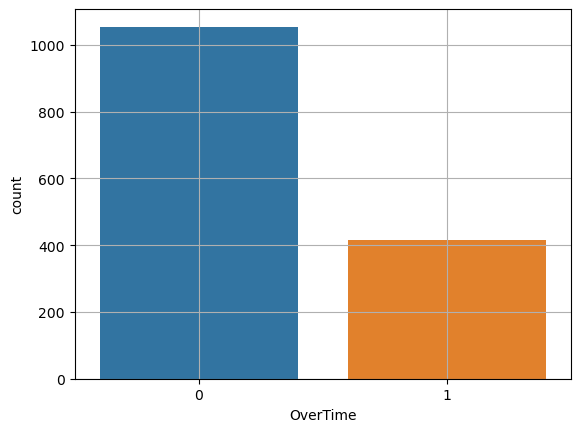

In [73]:
eda_1_cat('OverTime', data2)

* 전체 직원의 28%가 야근을 하는 것으로 나타났다. 
* 퇴사 비율보다 야근 비율이 높은 것으로 나타났다.

**Gender**

Gender
Male      882
Female    588
Name: count, dtype: int64

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

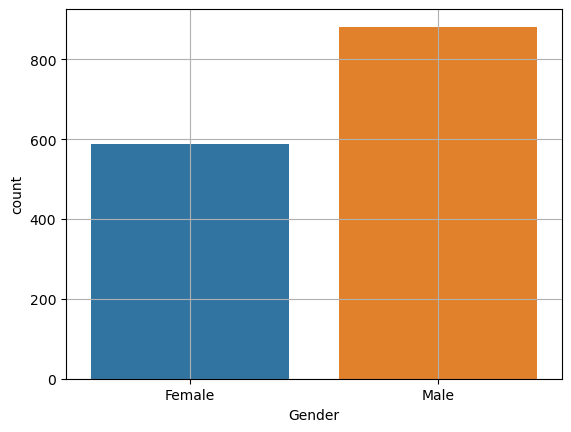

In [74]:
eda_1_cat('Gender', data2)

* 전체 직원의 40%가 여자, 60%가 남자이다.

**EducationField**

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

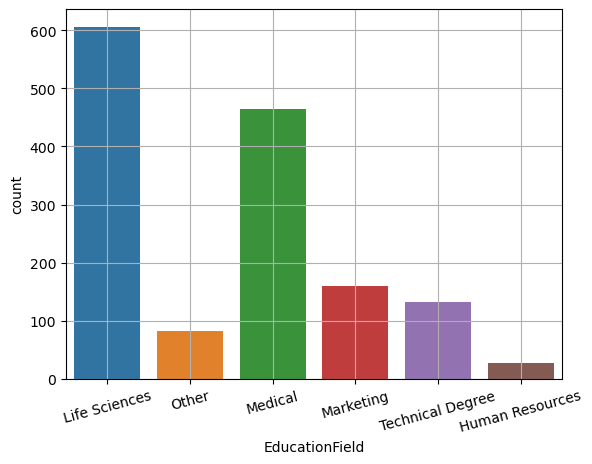

In [76]:
eda_1_cat('EducationField', data2, 15)

* Life Sciences 전공이 전체 직원의 40%, Medical 전공이 전체 직원의 30%로 가장 많은 비율을 차지한다.

**Department**

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Department
Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: proportion, dtype: float64

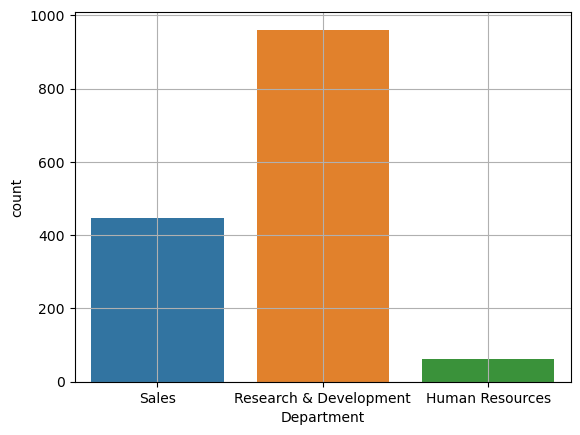

In [77]:
eda_1_cat('Department', data2)

* Research & Development Department가 65%로 가장 많은 비율을 차지하며, Human Resources는 4%로 가장 적은 비율을 차지한다.

**MaritalStatus**

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

MaritalStatus
Married     0.457823
Single      0.319728
Divorced    0.222449
Name: proportion, dtype: float64

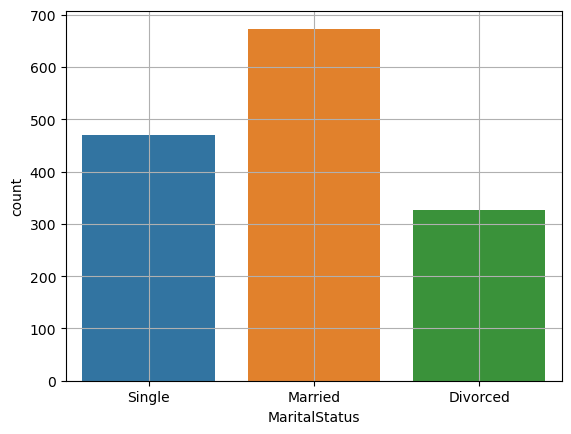

In [82]:
eda_1_cat('MaritalStatus', data2)

* Married > Single > Divorced

**BusinessTravel**

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: proportion, dtype: float64

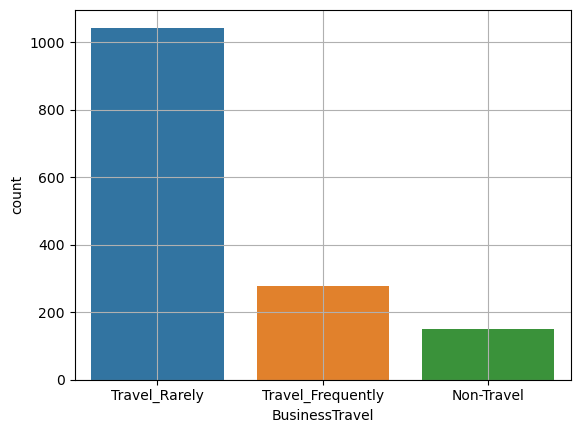

In [78]:
eda_1_cat('BusinessTravel', data2)

* 70%의 대부분 직원들이 가끔 출장을 나가며, 출장을 전혀 가지 않는 직원은 전체의 10%이다.

##### **범주형 변수**

**Age**

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0


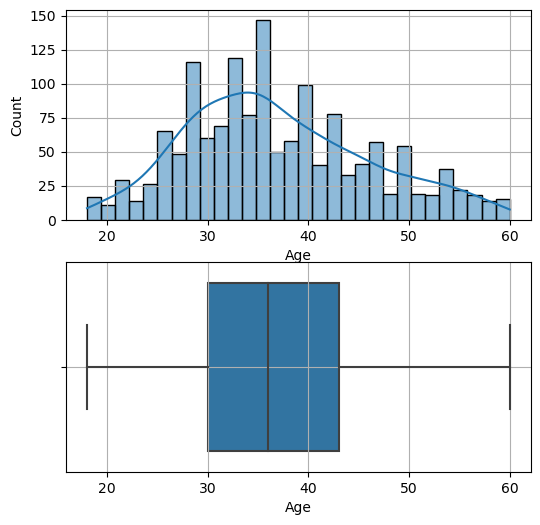

In [31]:
eda_1_num('Age', data2)

* 최솟값 : 18, 최댓값 : 60, 평균 나이 : 37세, 중앙값 : 36

**MonthlyIncome**

,count,mean,std,min,25%,50%,75%,max
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0


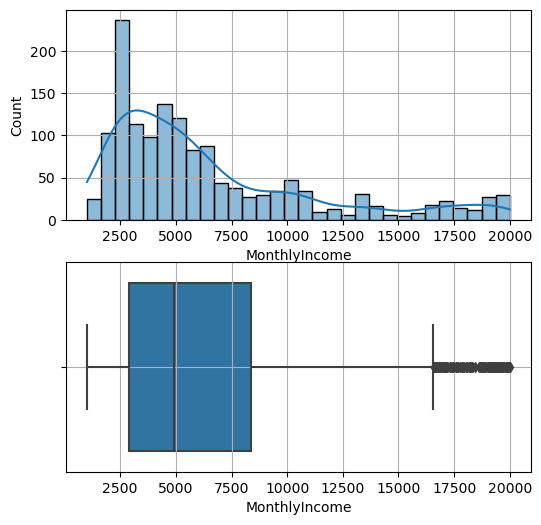

In [32]:
eda_1_num('MonthlyIncome', data2)

* 75%의 직원이 8500 달러 이하의 월 소득이 있다.
* 15000 달러를 넘어가는 이상치들을 많이 발견할 수 있다.
* 평균 소득은 6502, 중앙값은 4919로 평균보다 높은 값들이 평균을 높인다는 것을 알 수 있다.

**Distance**

,count,mean,std,min,25%,50%,75%,max
Distance,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


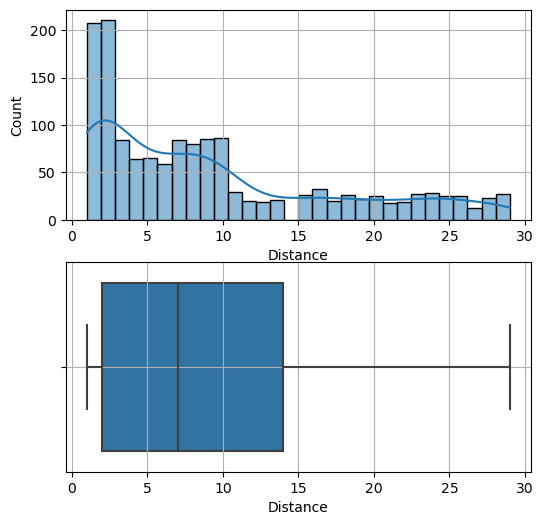

In [83]:
eda_1_num('Distance', data2)

* 75%의 직원이 14마일 이하의 거리에 거주하고 있다.

**PercentSalaryHike**

,count,mean,std,min,25%,50%,75%,max
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0


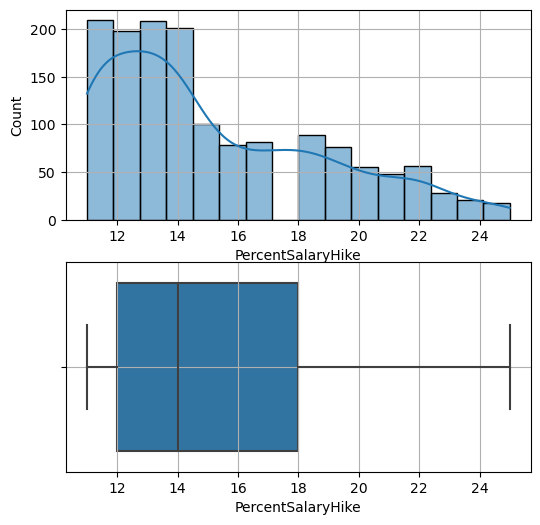

In [86]:
eda_1_num('PercentSalaryHike', data2, 16)

* 75%의 직원이 18% 이하의 인상율을 달성했다.

#### **이변량 분석**

##### **수치형(x) -> 수치형(y)**

In [8]:
# 수치형 -> 수치형
def num_to_num(x, y, data):
    # 수치화
    print(spst.pearsonr(data[x], data[y]))
    
    # 그래프
    plt.scatter(x = x, y = y, data = data)
    plt.show()

**'Age' -> 'MonthlyIncome'**

PearsonRResult(statistic=0.49785456692658037, pvalue=6.669539203000345e-93)


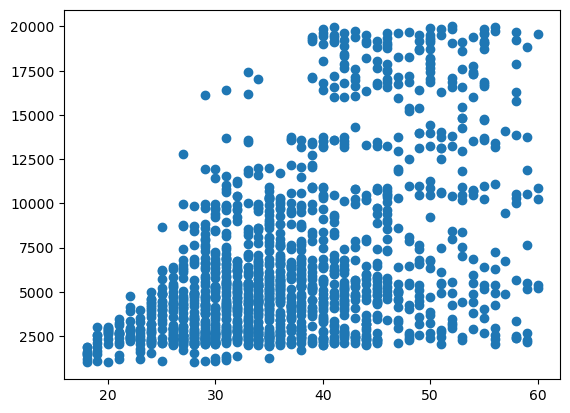

In [9]:
num_to_num('Age', 'MonthlyIncome', data2)

* p-value가 0.05보다 작기 때문에 'Age'와 'MonthlyIncome' 간의 상관계수가 의미가 있으며, 상관계수는 0.498로 중간 정도 강한 관계를 가지고 있다고 볼 수 있다.
* 그래프를 통해 나이가 많아질수록 월 소득이 올라가는 추세인 것을 확인할 수 있다. 하지만, 45세 이상에서는 나이보다 다른 요소들이 월 소득에 많은 영향을 주는 것 같다.

PearsonRResult(statistic=-0.012872915931731167, pvalue=0.8323189981416305)


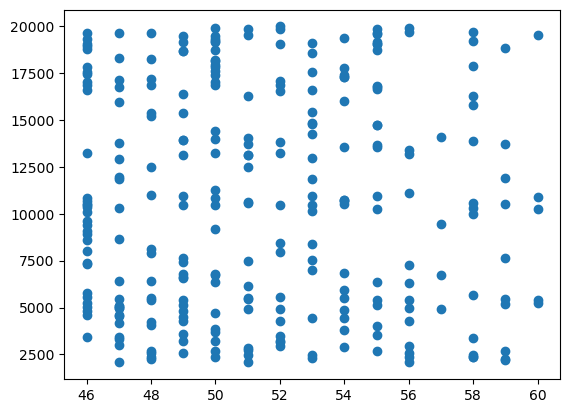

In [10]:
# 45세 이상
num_to_num('Age', 'MonthlyIncome', data2.loc[data2['Age'] > 45])

* 실제로, 45세 이상인 데이터의 나이와 월 소득으로 산점도를 그렸을 때 두 변수 간의 관계를 찾기가 쉽지 않다.
* p-value는 0.83으로 1에 가까우며, 상관계수는 0에 매우 가까운 수준으로 두 변수 간의 관계가 없다고 판단할 수 있다.

**'MonthlyIncome' -> 'PercentSalaryHike'**

PearsonRResult(statistic=-0.027268586440314477, pvalue=0.2961162029963466)


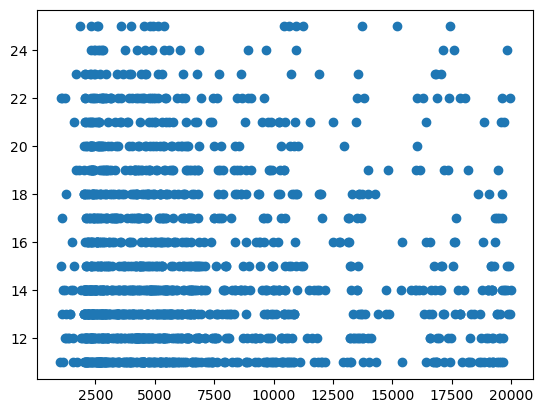

In [12]:
num_to_num('MonthlyIncome', 'PercentSalaryHike', data2)

* p-value가 0.05보다 크므로, 상관계수가 의미가 없다고 판단할 수 있다.

In [14]:
data2.corr(numeric_only = True)

,Age,Attrition,DailyRate,Distance,Education,EmployeeNo,E_Sat,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,R_Sat,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Distance,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNo,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
E_Sat,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


##### **범주형(x) -> 수치형(y)**

In [126]:
# 범주형 -> 수치형
def cat_to_num(*df, x, y, data):
    # 수치화
    if len(df) == 2:
        print(spst.ttest_ind(*df))  # t-test
    else:
        print(spst.f_oneway(*df))  # ANOVA
    
    # 그래프
    sns.barplot(x = x, y = y, data = data)
    plt.grid()
    plt.show()

**'Education' -> 'MonthlyIncome'**

F_onewayResult(statistic=3.8929774134094077, pvalue=0.003768508926919263)


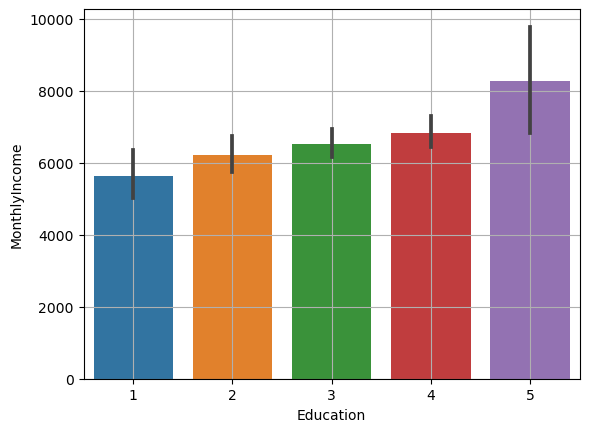

In [128]:
E1 = data2.loc[data2['Education'] == 1, 'MonthlyIncome']
E2 = data2.loc[data2['Education'] == 2, 'MonthlyIncome']
E3 = data2.loc[data2['Education'] == 3, 'MonthlyIncome']
E4 = data2.loc[data2['Education'] == 4, 'MonthlyIncome']
E5 = data2.loc[data2['Education'] == 5, 'MonthlyIncome']

cat_to_num(E1, E2, E3, E4, E5, x = 'Education', y = 'MonthlyIncome', data = data2)

* 그래프로 확인하였을 때 각 그룹 별 평균의 차이가 있긴 하지만, 신뢰구간이 겹치기 때문에 학력에 따른 월 소득에 큰 차이는 없어 보인다.
* p-value가 0.05보다 작고, f-통계량이 3보다 크기 때문에 관계가 약간 있다고 해석할 수 있다. 

**'PerformanceRating' -> 'PercentSalaryHike'**

TtestResult(statistic=-46.7674329634661, pvalue=4.2715951763441916e-293, df=1468.0)


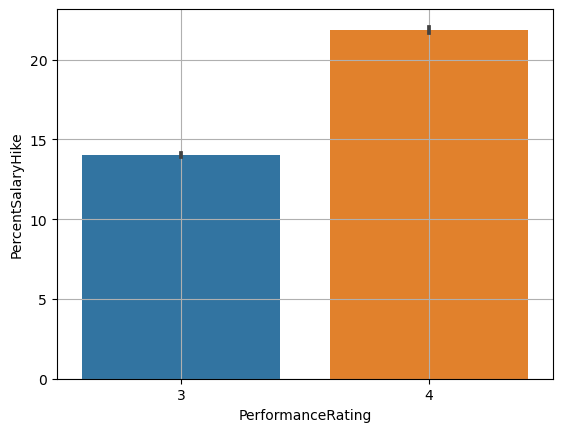

In [131]:
P3 = data2.loc[data2['PerformanceRating'] == 3, 'PercentSalaryHike']
P4 = data2.loc[data2['PerformanceRating'] == 4, 'PercentSalaryHike']

cat_to_num(P3, P4, x = 'PerformanceRating', y = 'PercentSalaryHike', data = data2)

* p-value가 0에 매우 가깝고, t-통계량이 46으로 'PerformanceRating'과 'PercentSalaryHike' 사이의 관계가 큰 것을 알 수 있다.
* 그래프를 봐도 두 그룹의 평균의 차이가 크고, 신뢰구간이 매우 작다.

##### **수치형(x) -> 범주형(y)**

In [141]:
# 수치형 -> 범주형
def num_to_cat(x, y, data):
    plt.figure(figsize = (8, 3))
    
    plt.subplot(1, 3, 1)
    sns.kdeplot(x = x, data = data, hue = y, common_norm = False)
    plt.grid()
    
    plt.subplot(1, 3, 2)
    sns.kdeplot(x = x, data = data, hue = y, multiple = 'fill')
    plt.grid()
    
    plt.subplot(1, 3, 3)
    sns.histplot(x = x, data = data, hue = y, multiple = 'fill')
    plt.axhline(data[y].mean(), color = 'r')
    
    plt.tight_layout()
    plt.show()

**'Age' -> 'Attrition'**

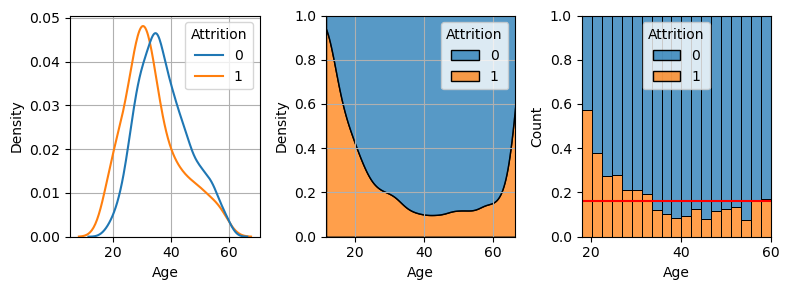

In [142]:
num_to_cat('Age', 'Attrition', data2)

* 30세 이전 직원들의 퇴사율이 높다.

**'MonthlyIncome' -> 'Attrition'**

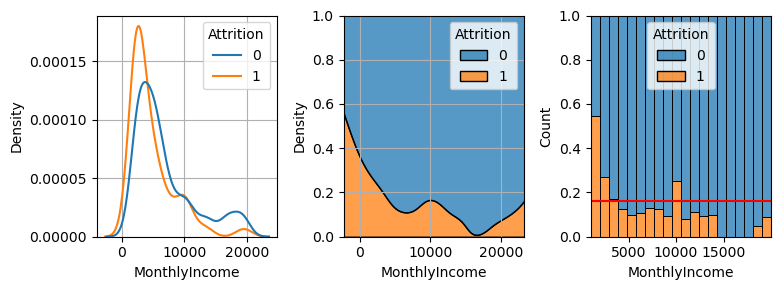

In [143]:
num_to_cat('MonthlyIncome', 'Attrition', data2)

* 2500달러 이하 직원의 퇴사율이 높다. 10000달러일 때 퇴사율이 높은 경향이 있다.

##### **범주형(x) -> 범주형(y)**

In [151]:
# 범주형 -> 범주형
def cat_to_cat(x, y, data):
    # 수치화
    table = pd.crosstab(data[x], data[y])
    result  = spst.chi2_contingency(table)
    print('카이제곱통계량 : ', result[0])
    print('p-value : ', result[1])
    print('자유도 : ', result[2])
    print('기대빈도 : \n', result[3])
    
    # 그래프
    mosaic(data, [x, y])
    plt.axhline(data[y].mean(), color = 'r')
    plt.show()

**'MaritalStatus' -> 'Attrition'**

카이제곱통계량 :  46.163676540848705
p-value :  9.45551106034083e-11
자유도 :  2
기대빈도 : 
 [[274.27959184  52.72040816]
 [564.49591837 108.50408163]
 [394.2244898   75.7755102 ]]


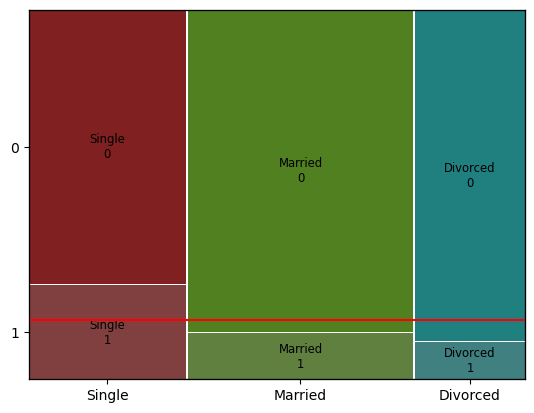

In [152]:
cat_to_cat('MaritalStatus', 'Attrition', data2)

* 카이제곱 통계량이 자유도 2보다 2배 이상 크고, p-value가 0.05보다 작기 때문에 MaritalStatus와 Attrition이 관련이 있다고 해석할 수 있다.

**'OverTime' -> 'Attrition'**

카이제곱통계량 :  87.56429365828768
p-value :  8.15842372153832e-21
자유도 :  1
기대빈도 : 
 [[884.06938776 169.93061224]
 [348.93061224  67.06938776]]


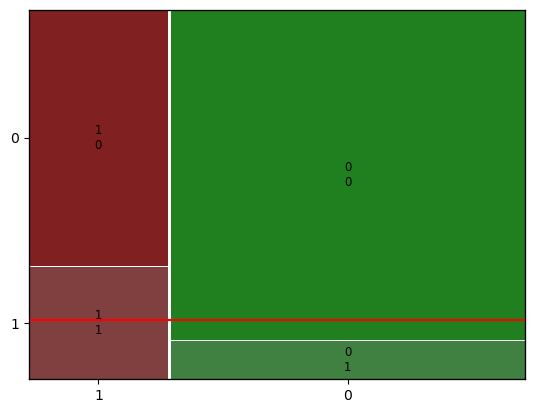

In [153]:
cat_to_cat('OverTime', 'Attrition', data2)

* 카이제곱 통계량이 자유도 1보다 2배 이상 크고, p-value가 0.05보다 작기 때문에 OverTime과 Attrition이 관련이 있다고 해석할 수 있다.